/home/jj/miniconda3/envs/diff_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  4.05it/s]


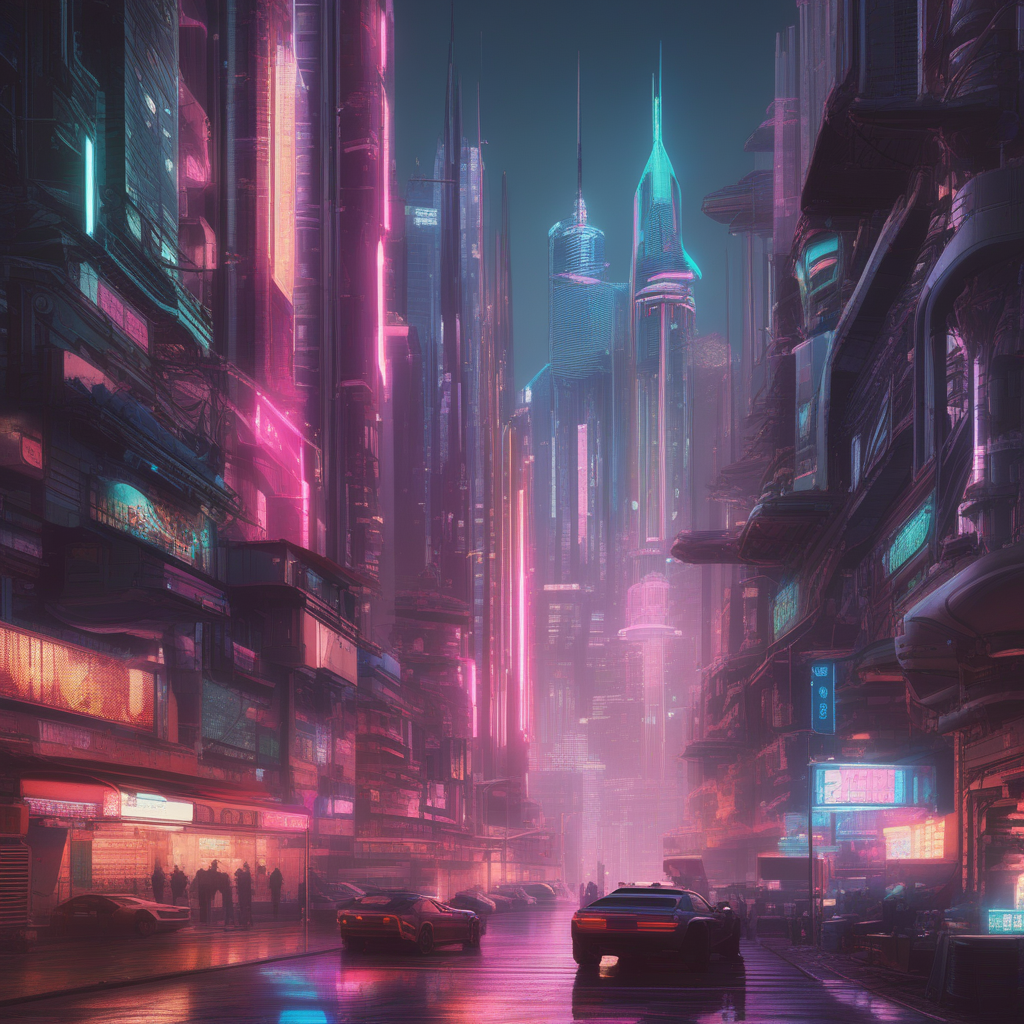

In [1]:
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler
import torch
from PIL import Image
from IPython.display import display

# Load the base model for text-to-image generation
base_pipeline = StableDiffusionXLPipeline.from_pretrained(
    "./stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16  # Use float16 for GPU efficiency, or float32 if there are compatibility issues
)
base_pipeline.scheduler = DPMSolverMultistepScheduler.from_config(base_pipeline.scheduler.config)
base_pipeline.to("cuda")

# Generate an initial image with the base model
def generate_initial_image(prompt, num_inference_steps=25, height=1024, width=1024):
    """
    Generate an initial image from a text prompt using the base model.
    
    Parameters:
    - prompt: str, description of the desired image.
    - num_inference_steps: int, number of inference steps (higher = more detailed but slower).
    - height: int, height of the generated image.
    - width: int, width of the generated image.

    Returns:
    - Image object of the generated initial image.
    """
    try:
        initial_image = base_pipeline(
            prompt=prompt,
            num_inference_steps=num_inference_steps,
            height=height,
            width=width
        ).images[0]
        return initial_image
    except ValueError as e:
        print("Error during initial image generation:", e)
        raise e

# Example usage to display in Jupyter Notebook
if __name__ == "__main__":
    # Generate an initial image using only the base model
    text_prompt = "A futuristic cityscape with towering skyscrapers and neon lights."
    initial_image = generate_initial_image(prompt=text_prompt)
    
    # Display the generated image in the notebook
    display(initial_image)


Loading pipeline components...: 100%|█████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (122 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['braid. the dress is red and gold with intricate embroidery and is captured with fine detail. the lighting is soft and natural, and the photo is taken with a professional camera, emphasizing a genuine, lifelike expression.']
Token indices sequence length is longer than the specified maximum sequence length for this model (122 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['braid. the dress is red and gold with intricate embroidery and is captured with fine de

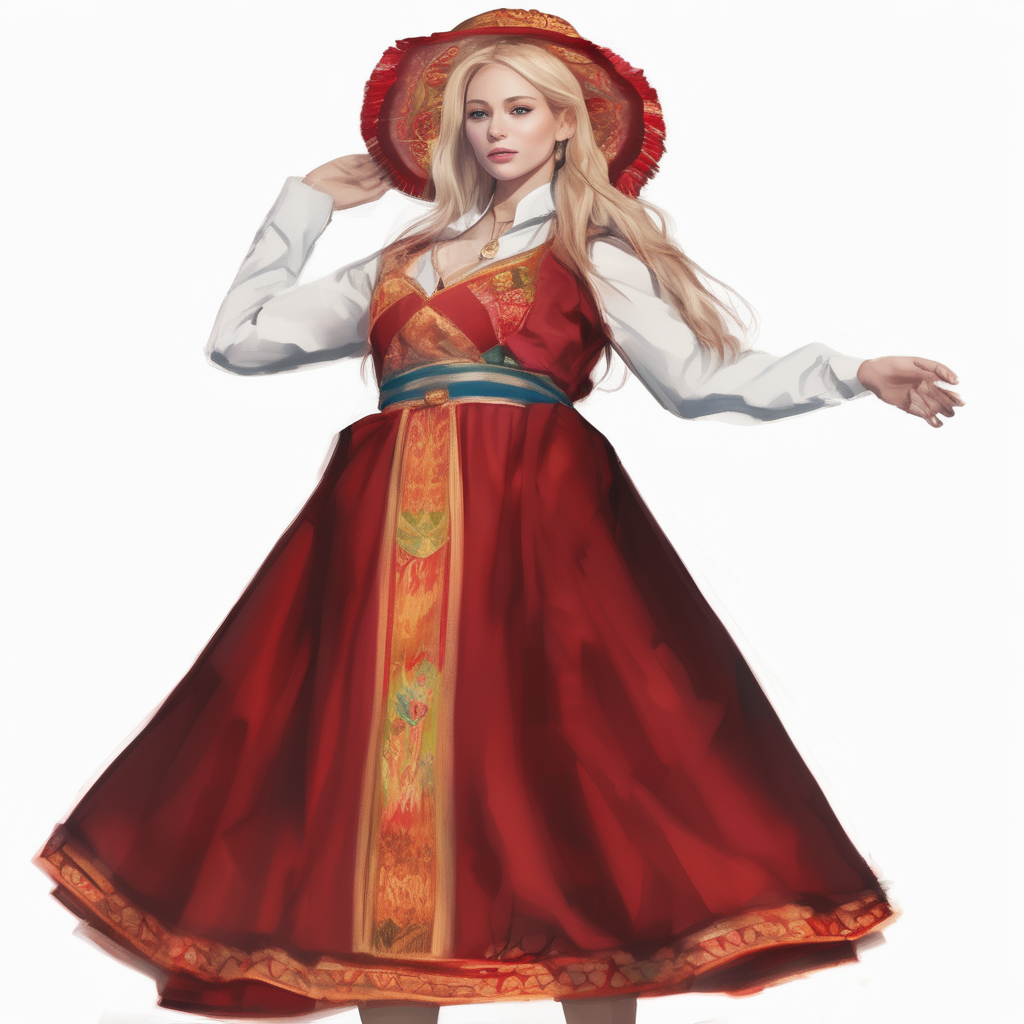

In [23]:
from diffusers import StableDiffusionXLImg2ImgPipeline, DPMSolverMultistepScheduler
import torch
from PIL import Image
from IPython.display import display

# Load the image-to-image pipeline
img2img_pipeline = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "./stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)
img2img_pipeline.scheduler = DPMSolverMultistepScheduler.from_config(img2img_pipeline.scheduler.config)
img2img_pipeline.to("cuda")

# Image-to-Image style transfer function for photorealistic transformation
def generate_image_to_image(prompt, init_image_path, num_inference_steps=100, strength=0.85, height=1024, width=1024):
    """
    Modify an existing image based on a text prompt to transform it into a realistic photo style.
    
    Parameters:
    - prompt: str, description of the desired style or transformation.
    - init_image_path: str, path to the initial image.
    - num_inference_steps: int, number of inference steps.
    - strength: float, strength of the transformation (0 = identical to input, 1 = fully transformed).
    - height: int, height of the output image.
    - width: int, width of the output image.

    Returns:
    - Image object of the modified image.
    """
    # Load and resize the initial image
    init_image = Image.open(init_image_path).convert("RGB")
    init_image = init_image.resize((width, height))

    try:
        # Apply the style transfer with a higher strength and more steps
        transformed_image = img2img_pipeline(
            prompt=prompt,
            image=init_image,
            num_inference_steps=num_inference_steps,
            strength=strength,
            num_images_per_prompt=8

        ).images[0]
        return transformed_image
    except ValueError as e:
        print("Error during image-to-image generation:", e)
        raise e

# Example usage to display in Jupyter Notebook
if __name__ == "__main__":
    # Define the path to the initial image and the refined prompt for realistic transformation
    init_image_path = "/home/jj/llava/img/1.jpg"
    refined_prompt = "A high-resolution, ultra-realistic portrait photograph of a young sexy woman wearing traditional Eastern European clothing, standing in a bustling big city. The background shows tall buildings, street lights, and a lively cityscape slightly blurred to keep the focus on her. She has soft, fair skin with visible pores and natural texture, and her blonde hair is neatly styled in a braid. The dress is red and gold with intricate embroidery and is captured with fine detail. The lighting is soft and natural, and the photo is taken with a professional camera, emphasizing a genuine, lifelike expression."

    # Generate the photorealistic image
    photorealistic_image = generate_image_to_image(prompt=refined_prompt, init_image_path=init_image_path, height=1024, width=1024)
    
    # Display the photorealistic image in the notebook
    display(photorealistic_image)
